In [1]:
#Importar as bibliotecas necessárias:

import pandas as pd
import numpy as np
try:
    from pycoingecko import CoinGeckoAPI
except:
    !pip install pycoingecko --break-system-packages
    from pycoingecko import CoinGeckoAPI

import matplotlib.pyplot as plt


In [2]:
# Inicialização do API
cg = CoinGeckoAPI()

In [3]:
# Recolher dados históricos de preço do Bitcoin em Euros
price_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='eur', days=1800, interval='daily')

In [4]:
# Converter dados para DataFrame
df = pd.DataFrame(price_data['prices'], columns=['time', 'price'])
df['time'] = pd.to_datetime(df['time'], unit='ms')


In [5]:
# Calcular retorno logarítmico diário
df['log_return'] = np.log(df['price']).diff()


In [6]:
# Definir o número de dias e simulações
num_days = 365
num_simulations = 1000

In [7]:
# Definir o DataFrame para guardar os resultados das simulações
simulation_df = pd.DataFrame()

In [8]:
# Loop para as simulações de Monte Carlo
simulation_list = []
for x in range(num_simulations):
    count = 0
    price_series = []

    # Iniciar com o último preço conhecido
    price = df['price'].iloc[-1]
    price_series.append(price)

    # Gerar preços para cada dia
    for y in range(num_days):
        # Calcular a variação diária do preço
        price = price_series[count] * np.exp((df['log_return'].mean() - 0.5*df['log_return'].var())*1 + df['log_return'].std()*np.random.normal())
        price_series.append(price)
        count += 1

    simulation_list.append(pd.DataFrame(price_series, columns=[x]))

simulation_df = pd.concat(simulation_list, axis=1)


In [9]:
# Encontrar cenários mais prováveis, mais elevados e mais baixos
most_probable_sim = simulation_df.mean(axis=1)
highest_sim = simulation_df.max(axis=1)
lowest_sim = simulation_df.min(axis=1)


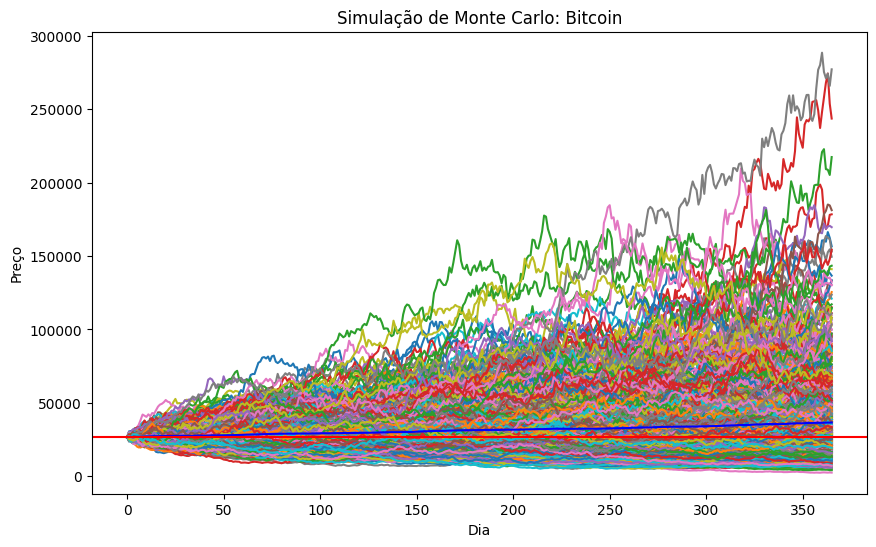

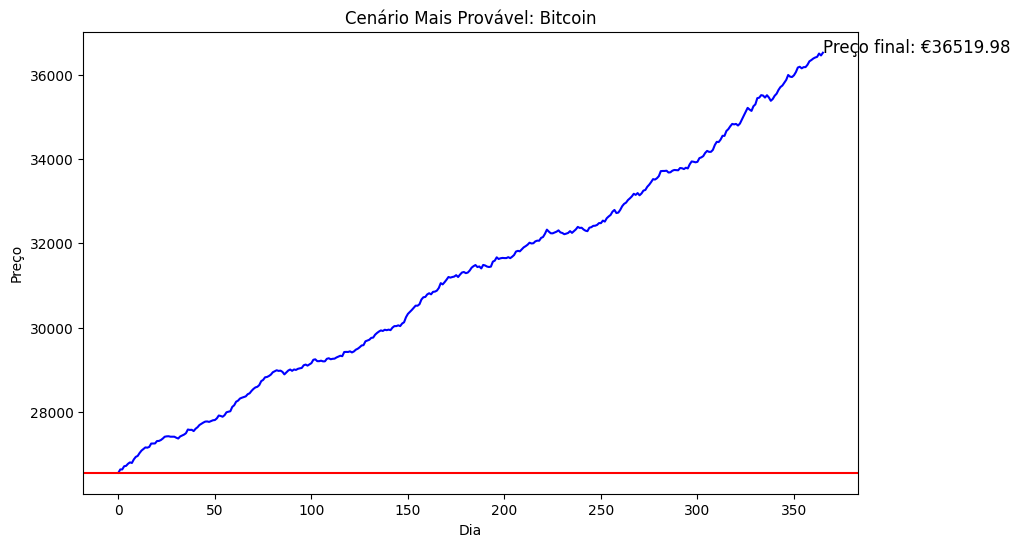

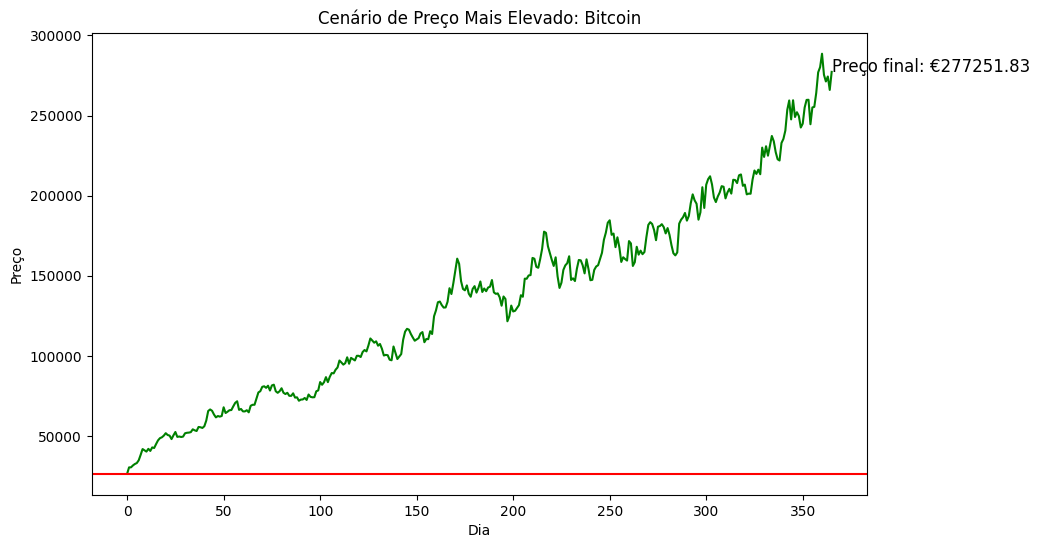

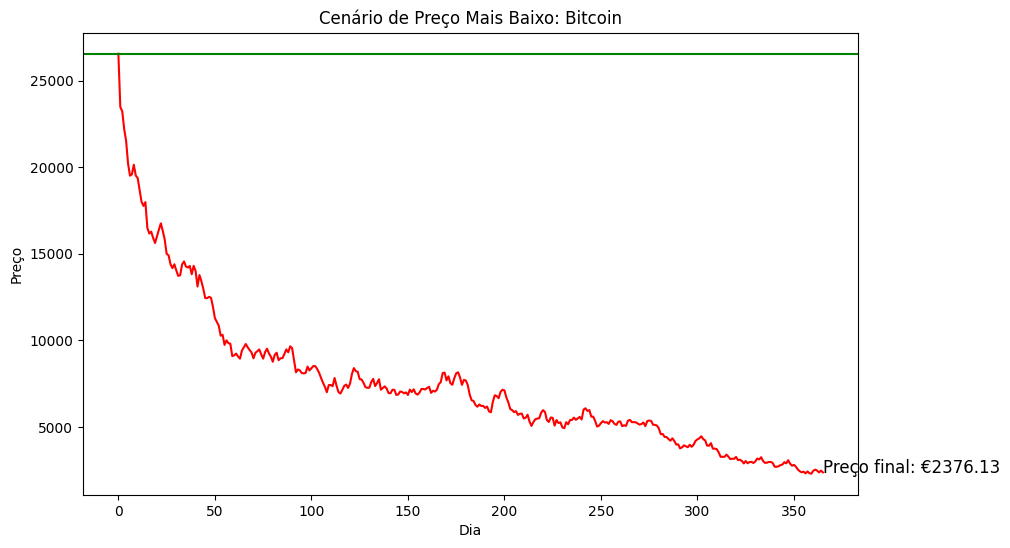

In [10]:
# Visualizar os resultados
plt.figure(figsize=(10,6))
plt.title('Simulação de Monte Carlo: Bitcoin')
plt.plot(simulation_df)
plt.plot(most_probable_sim, color = 'b')
plt.axhline(y = df['price'].iloc[-1], color = 'r', linestyle = '-')
plt.xlabel('Dia')
plt.ylabel('Preço')
plt.show()

plt.figure(figsize=(10,6))
plt.title('Cenário Mais Provável: Bitcoin')
plt.plot(most_probable_sim, color = 'b')
plt.axhline(y = df['price'].iloc[-1], color = 'r', linestyle = '-')
plt.xlabel('Dia')
plt.ylabel('Preço')
preco_final = most_probable_sim.iloc[-1]
plt.text(num_days, preco_final, f'Preço final: €{preco_final:.2f}', fontsize=12)
plt.show()

plt.figure(figsize=(10,6))
plt.title('Cenário de Preço Mais Elevado: Bitcoin')
plt.plot(highest_sim, color = 'g')
plt.axhline(y = df['price'].iloc[-1], color = 'r', linestyle = '-')
plt.xlabel('Dia')
plt.ylabel('Preço')
preco_final = highest_sim.iloc[-1]
plt.text(num_days, preco_final, f'Preço final: €{preco_final:.2f}', fontsize=12)
plt.show()

plt.figure(figsize=(10,6))
plt.title('Cenário de Preço Mais Baixo: Bitcoin')
plt.plot(lowest_sim, color = 'r')
plt.axhline(y = df['price'].iloc[-1], color = 'g', linestyle = '-')
plt.xlabel('Dia')
plt.ylabel('Preço')
preco_final = lowest_sim.iloc[-1]
plt.text(num_days, preco_final, f'Preço final: €{preco_final:.2f}', fontsize=12)
plt.show()


In [11]:
# Investimento inicial
investimento = 10000

# Calcular retornos
retorno_mais_provavel = (most_probable_sim.iloc[-1] / df['price'].iloc[-1] - 1) * investimento
retorno_mais_elevado = (highest_sim.iloc[-1] / df['price'].iloc[-1] - 1) * investimento
retorno_mais_baixo = (lowest_sim.iloc[-1] / df['price'].iloc[-1] - 1) * investimento

# Mensagem final
print(f"Após {num_days} dias, o preço final mais provável para o Bitcoin é: €{most_probable_sim.iloc[-1]:.2f}")
print(f"Para um investimento inicial de €{investimento}, o lucro potencial no cenário mais provável é: €{retorno_mais_provavel:.2f}")
print(f"No cenário mais favorável, o preço final do Bitcoin é: €{highest_sim.iloc[-1]:.2f} e o lucro potencial é: €{retorno_mais_elevado:.2f}")
print(f"No cenário menos favorável, o preço final do Bitcoin é: €{lowest_sim.iloc[-1]:.2f} e o lucro potencial é: €{retorno_mais_baixo:.2f}")


Após 365 dias, o preço final mais provável para o Bitcoin é: €36519.98
Para um investimento inicial de €10000, o lucro potencial no cenário mais provável é: €3748.25
No cenário mais favorável, o preço final do Bitcoin é: €277251.83 e o lucro potencial é: €94373.78
No cenário menos favorável, o preço final do Bitcoin é: €2376.13 e o lucro potencial é: €-9105.49
